# Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
#matplotlib.style.use('ggplot')

In [2]:
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=['user_id', 'age', 'sex', 'occupation', 'zip_code'])
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=['movie_id', 'title', 'release_date'], usecols=range(3),encoding='latin-1')
movielens = pd.merge(pd.merge(movies, ratings), users)

# User Occupation Analysis

## I. How are occupations distributed amongst the users?

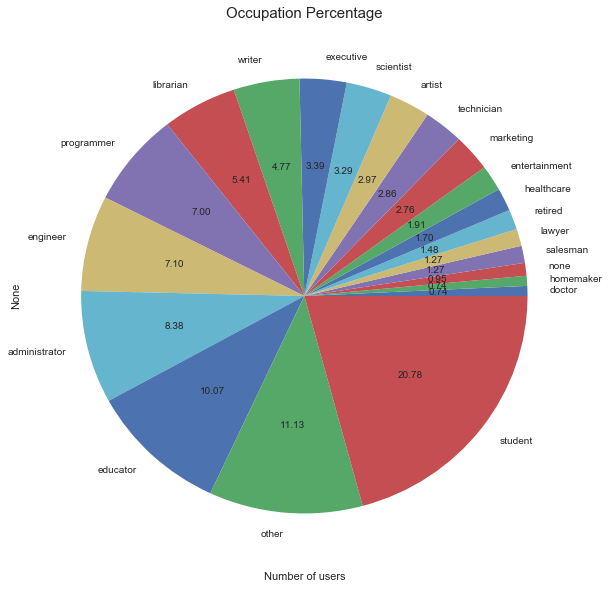

In [3]:
occu = users.groupby(['occupation']).size().sort_values()
occu_plot = occu.plot(kind='pie',figsize=[10, 10],autopct='%.2f')
occu_plot.set_xlabel('Number of users')
occu_plot.set_title('Occupation Percentage',fontsize=15)
plt.show()
fig = occu_plot.get_figure()
fig.savefig('../pics/0301OccupationPercentage.png', dpi=100)

#### As shown in the pie chart, the users in the dataset comes from 19 specified occupations. 
#### Students account for 20% of the users, which makes the biggest occupation group. Nearly half of the users are students or educators or administrators.

## II. How is the gender bias like in each profession?

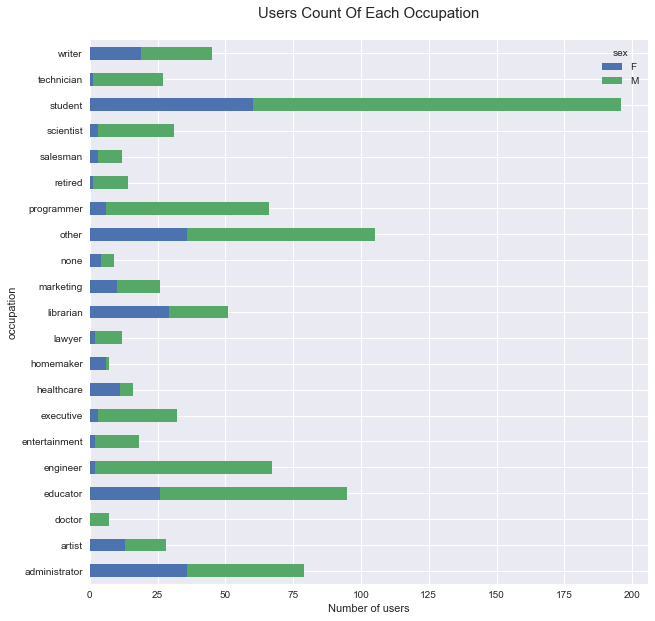

In [4]:
grouped = users.groupby(['occupation','sex']).size()
profession_count_plot = grouped.unstack().plot(kind='barh',stacked=True,figsize=[10, 10])
profession_count_plot.set_xlabel('Number of users')
profession_count_plot.set_title('Users Count Of Each Occupation\n',fontsize=15)
plt.show()
fig = profession_count_plot.get_figure()
fig.savefig('../pics/0302UsersCountOfEachOccupation.png', dpi=100)

#### As we can see in the stacked bar char above, in most of the occupations, there are more male users than female users. And this difference tends to be more remarkable when it comes to occupations with less people totally, such as the occupation 'technician', 'scientist', 'retired', 'entertainment'.

In [5]:
grouped_percent = users.groupby(['occupation','sex']).size()
grouped_percent = grouped_percent.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
grouped_percent.head()

occupation     sex
administrator  F       45.569620
               M       54.430380
artist         F       46.428571
               M       53.571429
doctor         M      100.000000
dtype: float64

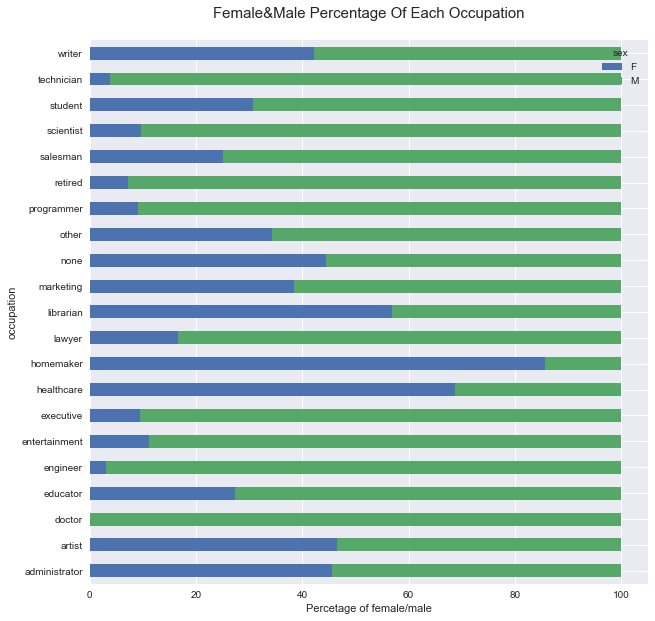

In [6]:
profession_percent_plot = grouped_percent.unstack().plot(kind='barh',stacked=True,figsize=[10, 10])
profession_percent_plot.set_xlabel('Percetage of female/male')
profession_percent_plot.set_title('Female&Male Percentage Of Each Occupation\n',fontsize=15)
plt.show()
fig = profession_percent_plot.get_figure()
fig.savefig('../pics/0303Female&MalePercentageOfEachOccupation.png', dpi=100)

#### As shown in the above graph, 'librarian', ' artist' and 'adminitrator' have the most balanced users with respect to gender, while 'doctor', 'engineer', 'technician' the least. 

## III. How 'old' is each profession?

In [7]:
grouped_age = users.groupby('occupation')['age'].agg(np.mean)

In [8]:
age_count = pd.DataFrame()
age_count['occupation'] = grouped_age.index
age_count['avg. age'] = grouped_age.values
age_count['count'] = users.groupby('occupation').size().values
age_count.head()

,occupation,avg. age,count
0,administrator,38.746835,79
1,artist,31.392857,28
2,doctor,43.571429,7
3,educator,42.010526,95
4,engineer,36.388060,67


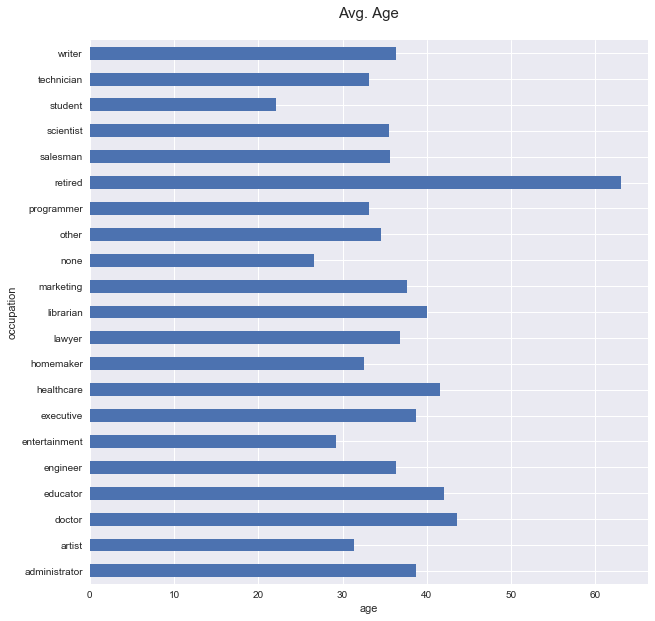

In [9]:
ax = grouped_age.plot(kind='barh',figsize=[10,10])
ax.set_xlabel('age')
ax.set_title('Avg. Age\n',fontsize=15)
plt.savefig('../pics/0304AvgAge.png', dpi=100)

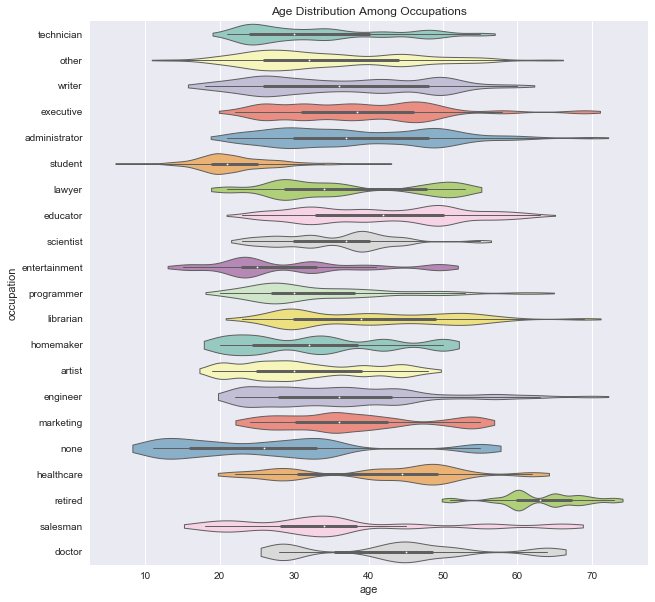

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.violinplot(data=users,x='age',y='occupation', palette="Set3", bw=.2, cut=1, linewidth=1,scale='width')
plt.title('Age Distribution Among Occupations')
plt.savefig('../pics/0305AgeDistributionAmongOccupations.png', dpi=100)

#### The 'oldest' occupations are 'retired', 'doctor', 'educator'. The 'youngest' occupations are 'student', 'entertainment', 'artist'.
#### Most of the occupations are in age range 20-40.

## IV. Do users from different professions tend to rate movies differently?

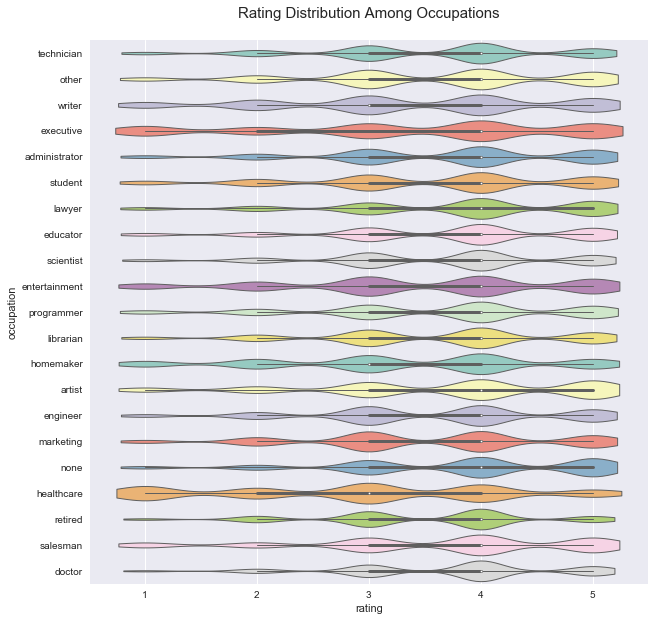

In [11]:
user_rating = pd.merge(users, ratings)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.violinplot(data=user_rating,x='rating',y='occupation', palette="Set3", bw=.2, cut=1, linewidth=1,scale='width')
plt.title('Rating Distribution Among Occupations\n', fontsize=15)
plt.savefig('../pics/0306RatingDistributionAmongOccupations.png', dpi=100)

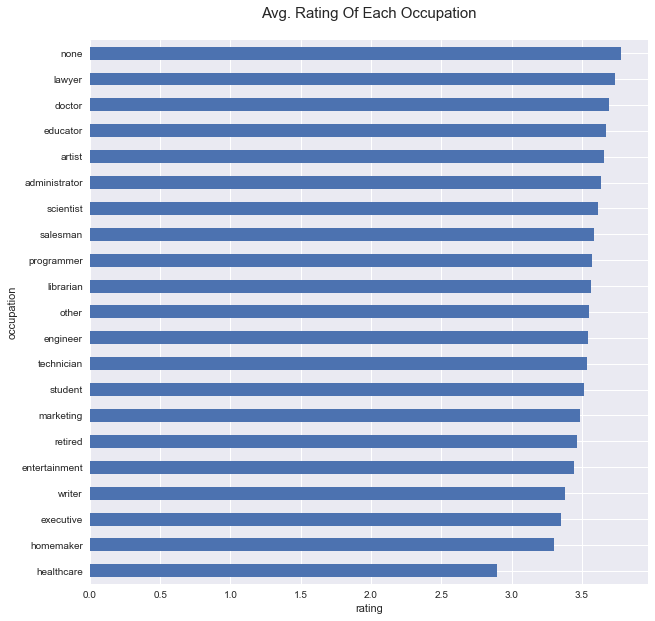

In [13]:
grouped_user_rating = user_rating.groupby(['occupation'])['rating'].agg(np.mean).sort_values()
ax = grouped_user_rating.plot(kind='barh',figsize=[10,10])
ax.set_title('Avg. Rating Of Each Occupation\n',fontsize=15)
ax.set_xlabel('rating')
fig = ax.get_figure()
fig.savefig('../pics/0307AvgRatingOfEachOccupation.png', dpi=100)

#### According to the graphs,  there's only slight difference in avg. ratings from users of different occupations. Yet healthcare people tends to rate movies the lowest and lawyers the highest. 